In [ ]:

def is_square_free( f ) :
    """
    This function checks if the polynomial `f` is square-free.
    """
    return gcd( f, f.derivative() ) == 1
    
def rad( f ) :
    """
    This function computes the radical of `f`.
    """
    # find the ring of polynomials
    P = f.parent()
    # return the radical
    return P(f/gcd(f,f.derivative()))
    
def square_free_decomposition( f, omit_trivial_factors = true ) :
    """
    This function takes a polynomial f and returns its square-free 
    decomposition computed using Tobey-Horowitz algorithm.
    The additional parameter omit_trivial_factors constrols whether factors = 1
    should be omitted (default) or not.
    """
    # The base ring must be a field of characteristic zero
    assert f.base_ring().characteristic() == 0, "The characteristic must be zero!"
    assert f.base_ring().is_field(), "The base ring must be a field!"

    # Store the ring of polys in P
    P = f.parent()
    # normalize f
    lcf = f.leading_coefficient()
    f = f.monic()
    # compute a0, a1 and b1
    a0 = f
    a1 = gcd(a0, a0.derivative())
    b1 = P( a0/a1 )
    # the list of square-free factors
    G = []
    # the counter
    j = 1
    # main loop
    while b1 != 1 :
        # compute next aj
        a0 = a1
        a1 = gcd(a0, a0.derivative()) 
        # compute next bj
        b2 =  P(a0/a1)
        # compute a square-free factor...
        gj = P(b1/b2)
        # ...and append it to G
        if gj != 1 or not omit_trivial_factors :
            G.append( (gj, j) )
        # substitute bj by b_{j+1}
        b1 = b2
        # increment the counter
        j += 1
    return Factorization(G, unit = lcf, sort = false)

<p><span style="color: #ff0000;">The above hidden cell will execute automatically upon opening the worksheet. It contains the following functions from exercise set 7:</span></p>
<ul>
<li><span style="color: #ff0000; font-family: courier new,courier;">is_square_free( f )</span></li>
<li><span style="color: #ff0000; font-family: courier new,courier;">rad( f )</span></li>
<li><span style="color: #ff0000; font-family: courier new,courier;">square_free_decomposition( f, omit_trivial_factors = true )</span></li>
</ul>
<p> </p>
<h1>Root bounds</h1>
<p><strong>Theorem (Cauchy):</strong> <em>Let $f = f_0 + f_1x + \dotsb + f_nx^n$ be a polynomial of degree~$n$ (i.e. $f_n \neq 0$) and let $\xi\in \mathbb C$ be a root of $f$. Then the absolute value of $\xi$ can be bounded as follows</em><br />\[<br />|\xi| < 1 + \max_{0\leq j\leq n-1} \left|\frac{f_j}{f_n}\right|.<br />\]</p>
<p><strong>Exercise:</strong> Compute the Cauchy bound (the "first one") for roots of $f=x^5 - 20x^4 + 152x^3 - 544x^2 + 900x - 529$ (example from LCM). Plot the graph of $f$ on the obtained interval.</p>
<p>1) Define the polynomial ring $P = \mathbb{Q}[x]$ together with the polynomial $f$</p>

In [4]:
P.<x> = QQ[];
f = P([-529,900,-544,152,-20,1]);
print(f)

x^5 - 20*x^4 + 152*x^3 - 544*x^2 + 900*x - 529


<p>2) Compute $M > 0$ such that $|\xi| < M$ for every root $\xi\in \mathbb{C}$ of $f$. Use Cauchy theorem.</p>

In [31]:
n = f.degree()
M = 1 + max( [abs(f[j]/f[n]) for j in [0..n-1]] )

In [32]:
show(M)

901

<p>3) Plot the graph of $f$ on $[-M, M]$. </p>

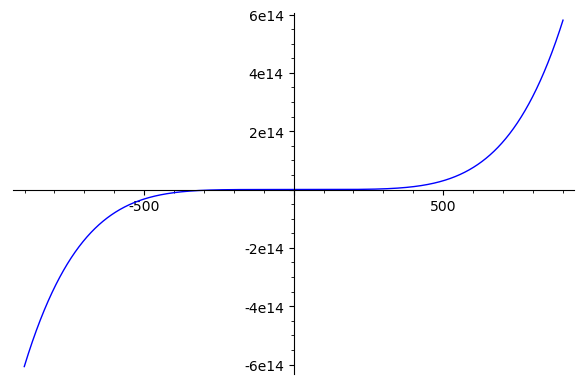

In [33]:
f.plot(-M,M)

<p><strong>Exercise:</strong></p>
<ul>
<li>Compute the arithemtic mean $\mu_f$ of roots of $f$.</li>
<li>Construct the <em>depressed</em> form $g$ of the polynomial $f$.</li>
<li>Compute the Cauchy bound $M_g$ for roots of the depressed polynomial.</li>
<li>Is $\mu_f \pm M_g$ a better bound than the one computed directly for $f$?</li>
</ul>

In [21]:
# arithmetic mean
mu_f = -f[n-1]/(n*f[n]); show(mu_f)

4

In [25]:
# depreesed polynomial
g = 1/f[n]*f(x+mu_f); show(g)

x^5 - 8*x^3 + 4*x - 1

In [27]:
# bound for the depressed polynomial
m = g.degree()
Mg = 1 + max( [abs(g[j]/g[m]) for j in [0..g.degree()-1]]  ); show(Mg)

9

In [28]:
# new bound for f
Mf = Mg+mu_f; show(Mf)

13

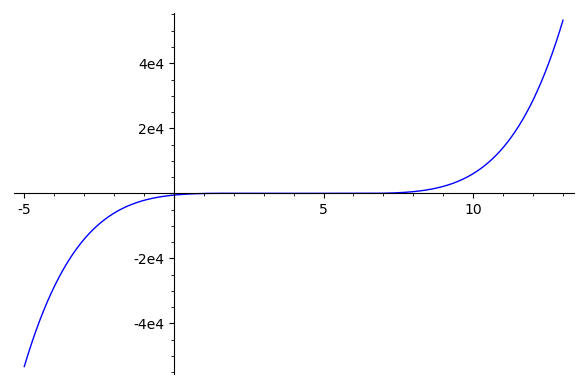

In [30]:
# plot of f on the new interval
f.plot(mu_f-Mg,mu_f+Mg)

<p><span id="cell_outer_16"><span id="cell_outer_3"><strong>Exercise:</strong> Write a function that computes the "first Cauchy bound" for the absolute value of roots of a given polynomial.</span></span></p>

In [34]:
def Cauchy_1( f ) :
    """
    Given a polynomial `f`, this function computes `M` s.t. all the roots of `f` are contained in `(-M,M)`.
    It uses the "first" Cauchy bound.
    """
    n = f.degree()
    M = 1 + max( [abs(f[j]/f[n]) for j in [0..n-1]] )
    return M

In [35]:
Cauchy_1(f)

901

<p><strong>Exercise:</strong> Write a function that construct the depressed form of a given polynomial $f$.</p>

In [36]:
# This function computes the depressed form of a given polynomial `f`.
def depress(f):
    n = f.degree();
    mu_f = -f[n-1]/(n*f[n]);
    g = 1/f[n]*f(x+mu_f);
    return g

In [37]:
depress(f)

x^5 - 8*x^3 + 4*x - 1

<p><strong>Theorem (Cauchy):</strong> Let $f = f_0 + f_1x + \dotsb + f_nx^n$ be a polynomial and $\xi\in \mathbb C$ its root, then\[|\xi| \leq \max_{0\leq j < n} \left(n \cdot \left|\frac{f_j}{f_n} \right|\right)^{\frac{1}{n-j}}.\]</p>
<p><strong>Exercise:</strong> Write a function that computes the "second" Cauchy bound for roots of a given polynomial. For our example polynomial, compare the results of these two bounds. Which one is better?</p>

In [50]:
#Function Cauchy 2
def Cauchy_2(f):
    n = f.degree();
    M = max( [(n*abs(f[j]/f[n]))^(1/(n-j)) for j in [0..n-1] ])
    return M

In [51]:
Cauchy_2(f)

100

In [52]:
Mf = mu_f + Cauchy_2(g)
show("M_f = " + latex(Mf) + "\\approx" + latex(round(Mf,2)))

M_f = 2 \, \sqrt{10} + 4 \approx 10.32

<p><strong>Theorem (Hong):</strong> Let $f = f_0 + f_1x + \dotsb + f_nx^n$ be a polynomial with a strictly positive leading coefficient. If $\xi\in \mathbb R$ is a root of $f$, then<br />\[<br />\xi < 2 \max_{\substack{j\in \{0,\dotsc, n-1\}\\ f_j < 0}}\min_{\substack{i\in \{j+1, \dotsc, n\}\\ f_i > 0}} \biggl( \frac{-f_j}{f_i} \biggr)^{\frac{1}{i-j}}.<br />\]</p>
<p><strong>Exercise:</strong> Write a function that computes Hong's bound for real roots of a polynomial.</p>

In [69]:
def Hong( f ) :
    """
    Given a polynomial `f`, thsi function computes `M > 0` s.t. all the REAL roots of `f` are contained in `(-M,M)`.
    It uses Hong's theorem.
    """
    if f.leading_coefficient() < 0 :
        f = -f
    n = f.degree()
    H = max([ min([ (-f[j]/f[i])^(1/(i-j)) for i in [j+1..n] if f[i] > 0 ]) for j in [0..n-1] if f[j] < 0 ])
    return 2*H

In [70]:
Hong(f)

40

In [71]:
Mf = mu_f + Hong(g)
show("M_f = " + latex(Mf) + "\\approx" + latex(round(Mf,2)))

M_f = 4 \, \sqrt{2} + 4 \approx 9.66

<p><strong>Exercise:</strong> Write a function that computes Vikglas' local-max bound for real roots of a given polynomial (see LCM).</p>

In [ ]:
# local_max(f)

In [ ]:
# Mf = mu_f + local_max(g)
# show("M_f = " + latex(Mf))

<p><strong>Theorem (Laguerre-Samuelson):</strong> Let $f = f_0 + f_1x +\dotsb + f_nx^n$ be a polynomial of degree $\deg f\geq 2$. Assume that all the roots of $f$ are real. Then the roots of $f$ are contained in the interval  $[M_-, M_+]$, where <br />\[ <br />M_\pm := -\frac{f_{n-1}}{n\cdot f_n} \pm \frac{n-1}{n}\cdot \sqrt{\frac{f_{n-1}^2}{f_n^2} - \frac{2n\cdot f_{n-2}}{(n-1)\cdot f_n}} <br />\]</p>
<p><strong>Exercise:</strong> Write a function that localizes the roots of a polynomial using Laguerre-Samuelson theorem. Compare the estimates computed by this function with the previous (simpler) bounds.</p>

In [ ]:
# Mm, Mp = Laguerre_Samuelson(f)
# show("(M_-,M_+)=("+latex(Mm)+","+latex(Mp)+")\\approx ("+latex(round(Mm,2))+","+latex(round(Mp,2)) +")")

In [ ]:
# plot the graph of f
# f.plot(Mm, Mp, ymin = -25, ymax = 25)

<p><strong>Exercise:</strong> Analyze the code of the following interactive cell. Play with it.</p>

In [ ]:
@interact
def illustration( f = input_box(default = x^2-1, label="$f=$"), 
               ab = range_slider([-10..10], default = (-2,2), label = "$(a,b)=$"),
               typ = selector(["Cauchy 1", "Cauchy 2", "Hong", "local-max", "Laguerre-Samuelson"]) ) :
    from sage.rings.polynomial.polynomial_element import is_Polynomial
    if not is_Polynomial(f) :
        pretty_print(html( "Argument $f$ musi być wielomianem!" ))
        return
    if typ == "Laguerre-Samuelson" :
        M1, M2 = Laguerre_Samuelson(f)
    else :
        switch = { "Cauchy 1" : Cauchy_1(f), "Cauchy 2" : Cauchy_2(f), "Hong" : Hong(f), "local-max" : local_max(f) }
        M2 = switch.get(typ)
        M1 = -M2
    show("Interval = " + latex((M1, M2)) + "\\approx" + latex(( round(M1,2), round(M2,2) )))
    show(f.plot(ab[0], ab[1]))